In [6]:
import torch
import torch.nn as nn
import torchvision.models as models
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from torchvision import transforms
import pandas as pd
from PIL import Image
import os

In [7]:
folder_path = 'images'
images = []
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        images.append(img)

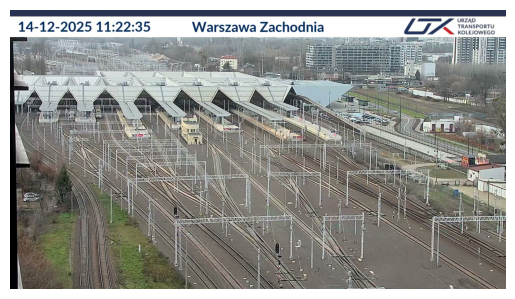

In [4]:
plt.imshow(images[0])
plt.axis('off')
plt.show()

In [4]:
from img2vec_pytorch import Img2Vec
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def encode_and_do_pca_all(encoder, images):
    vectors = []
    for img in images:
        vec = encoder.get_vec(img)
        vectors.append(vec)

    vectors = np.vstack(vectors)
    print("Vector shape:", vectors.shape)

    pca = PCA(n_components=2)
    vectors_reduced = pca.fit_transform(vectors)

    plt.figure(figsize=(6,6))
    plt.scatter(vectors_reduced[:, 0], vectors_reduced[:, 1], color='blue', s=5)
    plt.title('PCA analysis of all images')
    plt.show()

In [11]:
len(images)

1347

In [8]:
print("CUDA dostępna:", torch.cuda.is_available())
print("Liczba GPU:", torch.cuda.device_count())

if torch.cuda.is_available():
    print("Nazwa GPU:", torch.cuda.get_device_name(0))

CUDA dostępna: True
Liczba GPU: 4
Nazwa GPU: NVIDIA RTX A6000


Vector shape: (1347, 512)


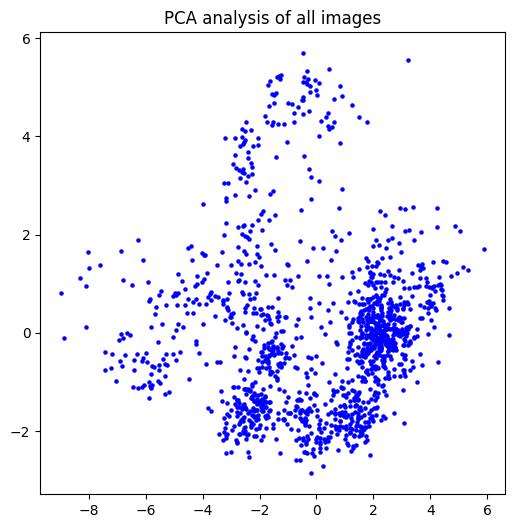

In [16]:
resnet18 = Img2Vec(model='resnet18', cuda=True)
encode_and_do_pca_all(resnet18, images)

Vector shape: (1347, 2048)


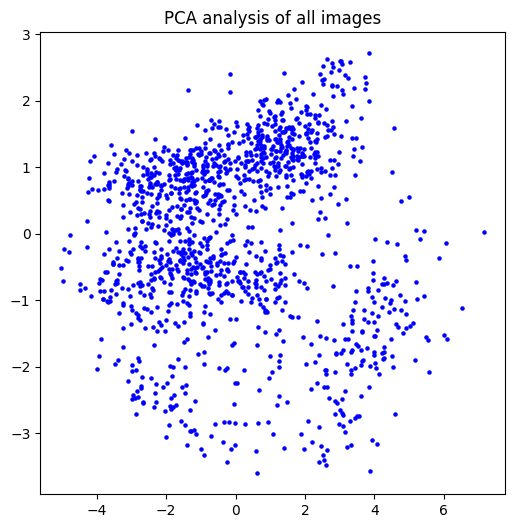

In [17]:
resnet152 = Img2Vec(model='resnet152',cuda=True)
encode_and_do_pca_all(resnet152,images)

Vector shape: (1347, 4096)


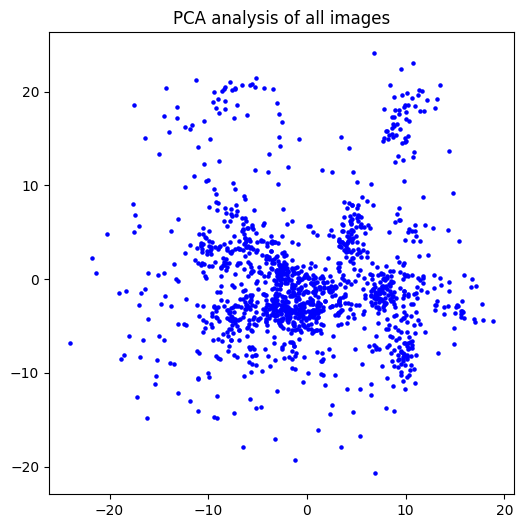

In [18]:
alexnet = Img2Vec(model='alexnet',cuda=True)
encode_and_do_pca_all(alexnet,images)

Vector shape: (1347, 4096)


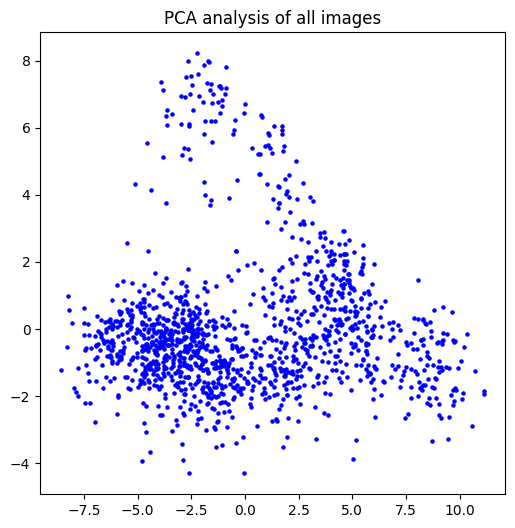

In [19]:
vgg19 = Img2Vec(model='vgg19',cuda=True)
encode_and_do_pca_all(vgg19,images)

Vector shape: (1347, 1920)


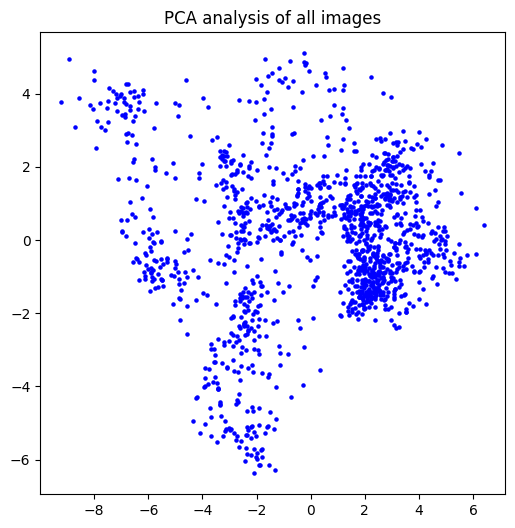

In [20]:
densenet201 = Img2Vec(model='densenet201',cuda=True)
encode_and_do_pca_all(densenet201,images)

Vector shape: (1347, 2560)


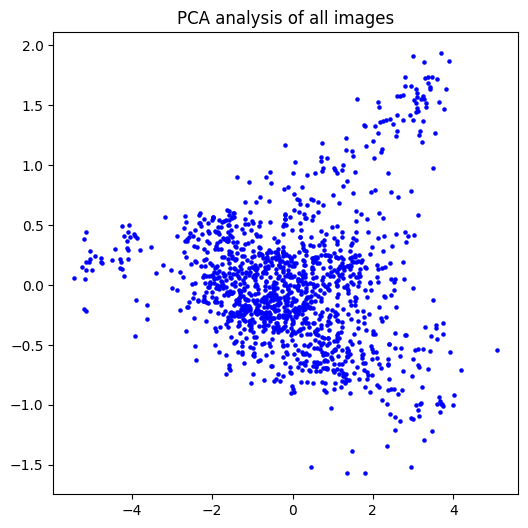

In [21]:
efficientnetb7 = Img2Vec(model='efficientnet_b7',cuda=True)
encode_and_do_pca_all(efficientnetb7,images)

In [1]:
import timm

/bakha/vhome/mfigurska/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class DinoExtractor:
    def __init__(self):
        self.model = timm.create_model('vit_small_patch16_224_dino', pretrained=True,)
        self.model.reset_classifier(0)
        self.model.eval()

    def get_vec(self, img):
        data_config = timm.data.resolve_model_data_config(self.model)
        transforms = timm.data.create_transform(**data_config, is_training=False)

        with torch.no_grad():
            features = self.model.forward_features(transforms(img).unsqueeze(0))
            output = self.model.forward_head(features, pre_logits=True)

        return output

Vector shape: (1347, 384)


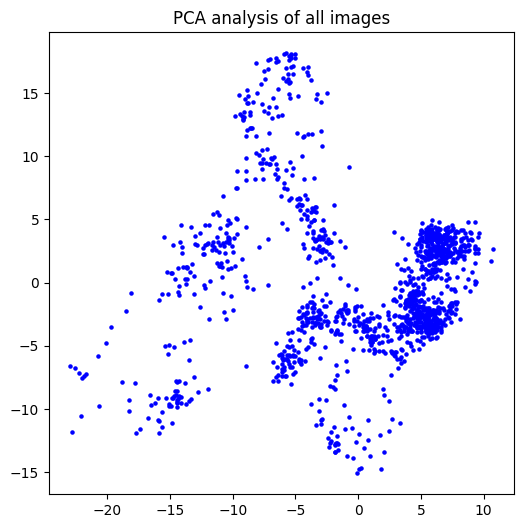

In [8]:
dino = DinoExtractor()
encode_and_do_pca_all(dino, images)